In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('', parse_dates=['Date/Time'])
display(df.head())
display(df.tail())
print(df.columns)

,Date/Time,Song Name,Artist,Song ID
0,2014-12-19T10:31:24Z,Bad (feat. Vassy) - Radio Edit,David Guetta,66b8a84c502856afb78afec2696f4de0
1,2014-12-19T10:31:26Z,Somebody To You,The Vamps,ecca7ca709d298d8610ec7987860b092
2,2014-12-19T10:31:31Z,Change Your Ticket,One Direction,4f316291aecef773c1b877cf6c148844
3,2014-12-22T19:45:10Z,Shower,Becky G,1997c967215fbd12595ff658ade0ef4d
4,2014-12-23T15:54:33Z,Shower,Becky G,1997c967215fbd12595ff658ade0ef4d


,Date/Time,Song Name,Artist,Song ID
179172,2025-08-26T13:01:00Z,Die 4 Me,Halsey,6VYAzAQGFsfEAwdorQaZuU
179173,2025-08-27T13:42:00Z,Die 4 Me,Halsey,6VYAzAQGFsfEAwdorQaZuU
179174,2025-08-27T13:47:00Z,On A Roll - Basic Tape Remix,Ashley O,5YtM5WjclCystH2Xzct19Y
179175,2025-08-27T13:53:00Z,Sorry Mama,phem,3DMgTBcfN6Qu1z9BUZuQjN
179176,2025-08-28T10:42:00Z,Morning In America,Jon Bellion,3NRzGK0pFfhUgU6i3Kg9m3


Index(['Date/Time', 'Song Name', 'Artist', 'Song ID'], dtype='object')


In [28]:
%matplotlib inline

In [29]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"], errors="coerce")
df["Date"] = df["Date/Time"].dt.date
df["Hour"] = df["Date/Time"].dt.hour
df["Weekday"] = df["Date/Time"].dt.day_name()
df["Month"] = df["Date/Time"].dt.month_name()

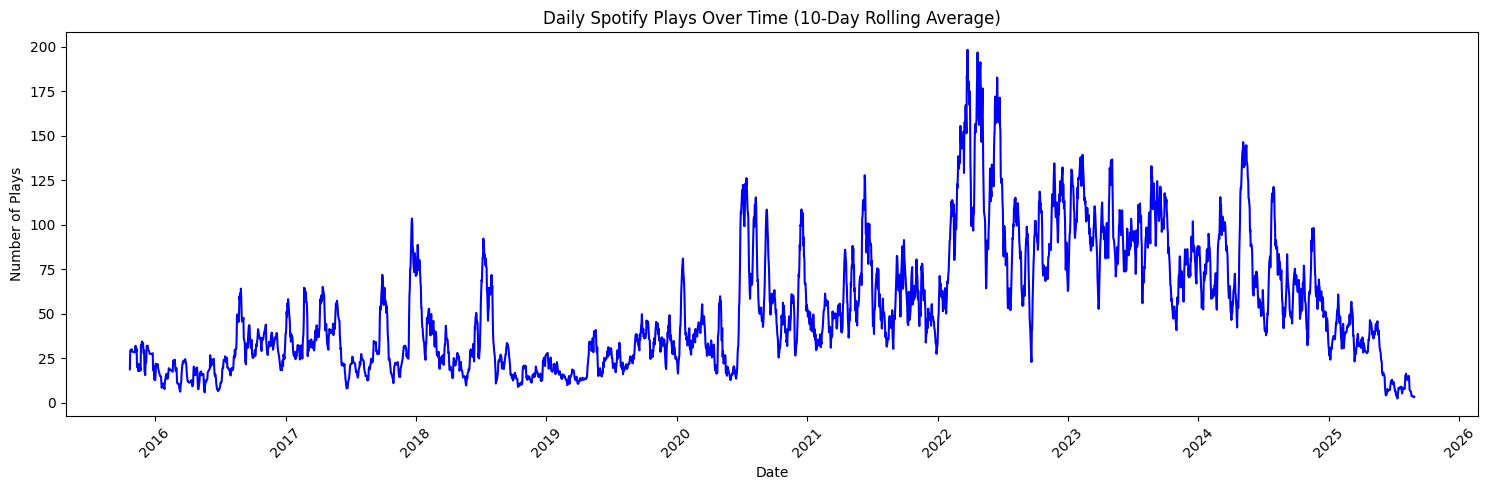

In [30]:
import matplotlib.pyplot as plt

daily_counts_rolling = daily_counts.rolling(window=10).mean()
plt.figure(figsize=(15,5))
daily_counts_rolling.plot(color='blue')
plt.title("Daily Spotify Plays Over Time (10-Day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Number of Plays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_41178/1303349473.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_song_names, x=top_songs.values, palette="magma")


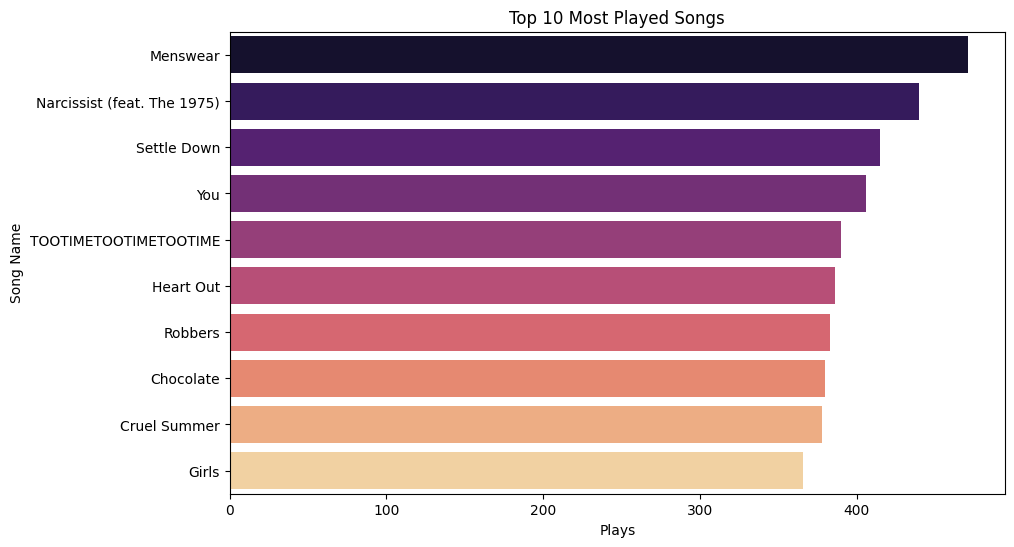

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_songs = df.groupby("Song ID").size().sort_values(ascending=False).head(10)
song_names = df.set_index("Song ID")["Song Name"].to_dict()
top_song_names = [song_names[song_id] for song_id in top_songs.index]

plt.figure(figsize=(10,6))
sns.barplot(y=top_song_names, x=top_songs.values, palette="magma")
plt.title("Top 10 Most Played Songs")
plt.xlabel("Plays")
plt.ylabel("Song Name")
plt.show()

/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_41178/3868059913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette="magma")


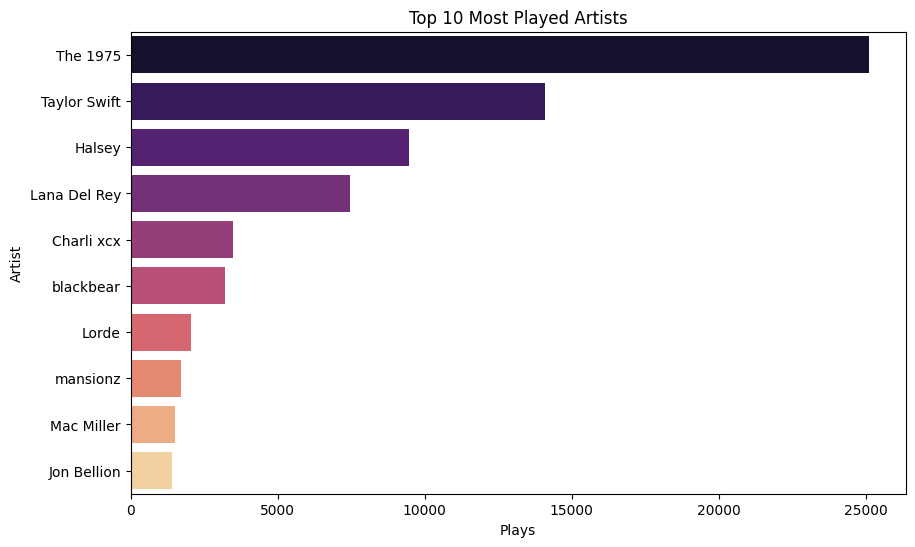

In [20]:
top_artists = df["Artist"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_artists.index, x=top_artists.values, palette="magma")
plt.title("Top 10 Most Played Artists")
plt.xlabel("Plays")
plt.ylabel("Artist")
plt.show()

/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_41178/4241473419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="Set2")


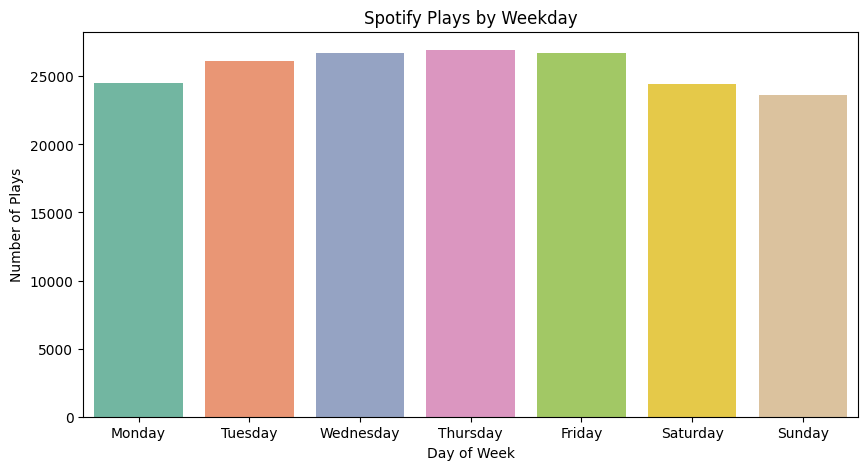

In [32]:
weekday_counts = df["Weekday"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="Set2")
plt.title("Spotify Plays by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Number of Plays")
plt.show()

/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_41178/1315565513.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="Spectral")


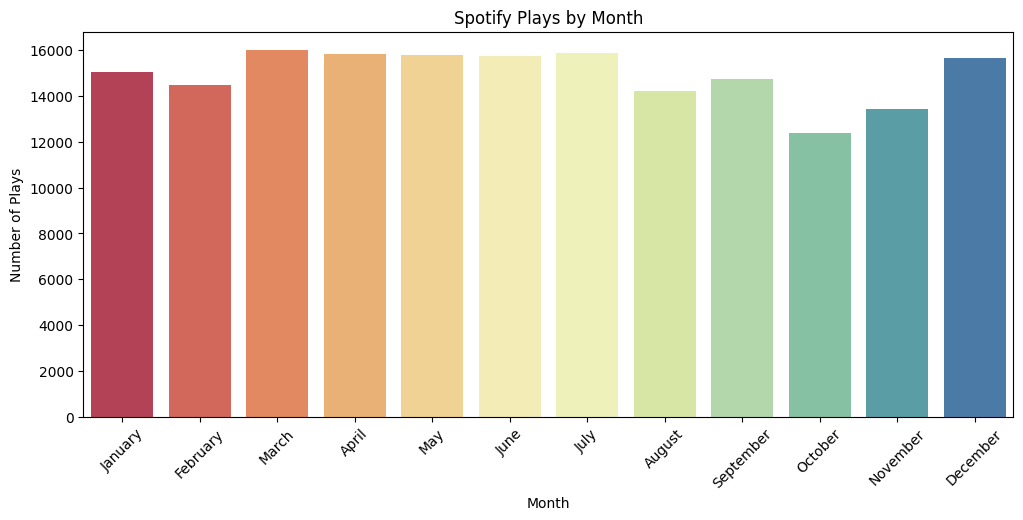

In [27]:
month_order = ["January","February","March","April","May","June","July","August",
               "September","October","November","December"]
monthly_counts = df["Month"].value_counts().reindex(month_order)
plt.figure(figsize=(12,5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="Spectral")
plt.title("Spotify Plays by Month")
plt.xlabel("Month")
plt.ylabel("Number of Plays")
plt.xticks(rotation=45)
plt.show()